# What do I need to do for the report?
1. BUild a model - how to build a model?
2. Know how to implement HMM - how?
3. Need to know the structure of data I'm dealing with (decide on pandas or numpy etc) - how?
4. Know how data is stored - how?
5. Extract read counts and store in some form - how?
6. Know how to extract and from where I can extract - how?
7. Think and look up where read counts can be extracted from - how?
8. Look at bam/SAM website & my bam files I have - how?
9. Update my bam files - how?
10. Run my REVISED code (by Clem, just * changed) - how?
11. Go to Beluga and type the command - how?
12. Log into MobaXTerm - how?
13. Bring my diary and type the pwd in - how?
14. Note down the password on my laptop, or I can't access without the diary

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
# from sklearn.svm import LinearSVC
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
fin = "460_ALU_TypeREF_MELT2_GIAB_test-version.csv"

In [3]:
df = pd.read_csv(fin)
df = df.astype(str)
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1
...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1


In [4]:
#df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"] + "-" + df["STOP"]
df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"].str[:6]
df["merged_name2"] = df["merged_name"].str[:10]
df["merged_name3"] = df["merged_name"].str[:9]
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1,chrX:112877,chrX:11287,chrX:1128
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1,chrX:119643,chrX:11964,chrX:1196
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1,chrX:135157,chrX:13515,chrX:1351
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1,chrX:138384,chrX:13838,chrX:1383


In [5]:
df_01 = df[df["GIAB"] == "0/1"]
df_01["merged_name3"].to_csv("GIAB_460_10_loci_3.csv", index=False, header=False)

In [6]:
df_11 = df[df["GIAB"] == "1/1"]
df_11["merged_name3"].to_csv("GIAB_460_11_loci_3.csv", index=False, header=False)

In [7]:
df_01

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,21,30601827,30602144,0/1,34,14,0/1,39,12,0/1,"-81.21,-32.51,-435.02",0/1,chr21:306018,chr21:3060,chr21:306
223,21,38961715,38961986,0/1,27,7,0/1,23,3,0/1,"-24.4,-17.46,-264.04",0/1,chr21:389617,chr21:3896,chr21:389
224,21,41586880,41587182,0/1,27,10,0/1,44,9,0/1,"-34.81,-18.66,-249.01",0/1,chr21:415868,chr21:4158,chr21:415
225,21,41957251,41957376,0/1,14,11,0/1,21,12,0/1,"-46.41,-25.29,-346.01",0/1,chr21:419572,chr21:4195,chr21:419


# Part 2

In [8]:
f00 = "GIAB_00_f2.csv"
f10 = "GIAB_10_f2.csv"
f11 = "GIAB_11_f2.csv"

In [9]:
df00 = pd.read_csv(f00, header=None)
df10 = pd.read_csv(f10, header=None)
df11 = pd.read_csv(f11, header=None)
df00 = df00.astype(str)
df10 = df10.astype(str)
df11 = df11.astype(str)
df00

,0
0,chr10:2402963-2403297/ 0/0 210 12 222
1,chr10:51539308-51539401/ 0/0 52 18 70
2,chr10:75969790-75970127/ 0/0 248 22 270
3,chr10:79764973-79765218/ 0/0 188 20 208
4,chr10:8516524-8516843/ 0/0 218 22 240
...,...
95,chr9:77503386-77503546/ 0/0 96 46 142
96,chrX:113850728-113851049/ 0/0 84 12 96
97,chrX:43238081-43238371/ 0/0 74 12 86
98,chrX:54290473-54290777/ 0/0 112 4 116


In [10]:
# split column into multiple columns by delimiter 
df00 = df00[0].str.split(' ', expand=True)
df10 = df10[0].str.split(' ', expand=True)
df11 = df11[0].str.split(' ', expand=True)

df00

,0,1,2,3,4
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [11]:
# locus = dir_name
df00.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df10.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df11.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df00

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [12]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df00 = df00.astype(dict_type_convert)
df10 = df10.astype(dict_type_convert)
df11 = df11.astype(dict_type_convert)
# print(df00.dtypes)

In [13]:
frames = [df00, df10, df11]
df_560 = pd.concat(frames)
# Remove the '/' at the end of directory name
df_560["locus"] = df_560["locus"].str.split("/").str[0]
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0/0,210,12,222
1,chr10:51539308-51539401,0/0,52,18,70
2,chr10:75969790-75970127,0/0,248,22,270
3,chr10:79764973-79765218,0/0,188,20,208
4,chr10:8516524-8516843,0/0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,1/1,24,38,62
232,chrX:119643312-119643638,1/1,24,62,86
233,chrX:135157983-135158330,1/1,24,46,70
234,chrX:138384895-138385237,1/1,16,44,60


In [14]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
51,chr14:34290036-34290387,1/1,32,92,124
56,chr15:24207058-24207377,1/0,114,50,164
121,chr3:114466120-114466443,1/1,102,10,112
19,chr11:8326058-8326206,1/0,46,38,84
218,chr8:97098074-97098440,1/1,32,102,134


In [15]:
df_560.groupby(by="GIAB_genotype")["f2_count_REF"].mean()

GIAB_genotype
0/0    171.900000
1/0     90.348214
1/1     45.737288
Name: f2_count_REF, dtype: float64

In [16]:
df_560["GIAB_genotype"] = df_560["GIAB_genotype"].map({"0/0":0,
                             "1/0":1,
                             "1/1":2,
                             np.nan:3},
                             na_action=None)
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0,210,12,222
1,chr10:51539308-51539401,0,52,18,70
2,chr10:75969790-75970127,0,248,22,270
3,chr10:79764973-79765218,0,188,20,208
4,chr10:8516524-8516843,0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,2,24,38,62
232,chrX:119643312-119643638,2,24,62,86
233,chrX:135157983-135158330,2,24,46,70
234,chrX:138384895-138385237,2,16,44,60


In [17]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
223,chr9:122531835-122532163,2,54,110,164
126,chr3:170119287-170119570,2,80,4,84
210,chr8:54204883-54205212,1,94,42,136
184,chr6:66274842-66275179,2,28,82,110
90,chr20:35815610-35815935,2,54,96,150


In [18]:
y = df_560["GIAB_genotype"].to_numpy()
X = df_560.iloc[:, 2:].to_numpy()

## SVM - Support Vector Machine

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"

clf = svm.SVC(kernel="linear", C=1)
#clf.fit(X_train, y_train)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[0.87777778 0.88888889 0.91111111 0.8988764  0.92134831]


In [36]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)
print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.897
Accuracy of linear SVC on test set: 0.911


## DNN - Deep Neural Network

In [22]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

,f2_count_REF,f2_count_ALT,f2_count
0,210.0,12.0,222.0
1,52.0,18.0,70.0
2,248.0,22.0,270.0
3,188.0,20.0,208.0
4,218.0,22.0,240.0
...,...,...,...
555,24.0,38.0,62.0
556,24.0,62.0,86.0
557,24.0,46.0,70.0
558,16.0,44.0,60.0


In [23]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "1/0", "1/1"])
df_GIAB_2_y

,0/0,1/0,1/1
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
555,0,0,1
556,0,0,1
557,0,0,1
558,0,0,1


In [24]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """build the Keras model callback"""
    model = Sequential()
    model.add(Dense(6, input_dim=3, activation='tanh', name='layer_1'))
    model.add(Dense(10, activation='tanh', name='layer_2'))
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

<ipython-input-24-c7f27e87d569>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(


In [25]:
history = estimator.fit(X_train, y_train)

Epoch 1/200
23/23 - 1s - loss: 1.1552 - accuracy: 0.0647 - 853ms/epoch - 37ms/step
Epoch 2/200
23/23 - 0s - loss: 1.1190 - accuracy: 0.3080 - 30ms/epoch - 1ms/step
Epoch 3/200
23/23 - 0s - loss: 1.0959 - accuracy: 0.3996 - 40ms/epoch - 2ms/step
Epoch 4/200
23/23 - 0s - loss: 1.0779 - accuracy: 0.3996 - 48ms/epoch - 2ms/step
Epoch 5/200
23/23 - 0s - loss: 1.0634 - accuracy: 0.3996 - 50ms/epoch - 2ms/step
Epoch 6/200
23/23 - 0s - loss: 1.0505 - accuracy: 0.4062 - 40ms/epoch - 2ms/step
Epoch 7/200
23/23 - 0s - loss: 1.0390 - accuracy: 0.6295 - 43ms/epoch - 2ms/step
Epoch 8/200
23/23 - 0s - loss: 1.0275 - accuracy: 0.7165 - 47ms/epoch - 2ms/step
Epoch 9/200
23/23 - 0s - loss: 1.0153 - accuracy: 0.5938 - 46ms/epoch - 2ms/step
Epoch 10/200
23/23 - 0s - loss: 1.0024 - accuracy: 0.5580 - 45ms/epoch - 2ms/step
Epoch 11/200
23/23 - 0s - loss: 0.9874 - accuracy: 0.6049 - 46ms/epoch - 2ms/step
Epoch 12/200
23/23 - 0s - loss: 0.9724 - accuracy: 0.6964 - 48ms/epoch - 2ms/step
Epoch 13/200
23/23 - 0s

Epoch 101/200
23/23 - 0s - loss: 0.3652 - accuracy: 0.8862 - 38ms/epoch - 2ms/step
Epoch 102/200
23/23 - 0s - loss: 0.3652 - accuracy: 0.8839 - 46ms/epoch - 2ms/step
Epoch 103/200
23/23 - 0s - loss: 0.3645 - accuracy: 0.8884 - 42ms/epoch - 2ms/step
Epoch 104/200
23/23 - 0s - loss: 0.3643 - accuracy: 0.8862 - 49ms/epoch - 2ms/step
Epoch 105/200
23/23 - 0s - loss: 0.3638 - accuracy: 0.8884 - 46ms/epoch - 2ms/step
Epoch 106/200
23/23 - 0s - loss: 0.3620 - accuracy: 0.8884 - 45ms/epoch - 2ms/step
Epoch 107/200
23/23 - 0s - loss: 0.3616 - accuracy: 0.8862 - 44ms/epoch - 2ms/step
Epoch 108/200
23/23 - 0s - loss: 0.3608 - accuracy: 0.8906 - 46ms/epoch - 2ms/step
Epoch 109/200
23/23 - 0s - loss: 0.3601 - accuracy: 0.8906 - 37ms/epoch - 2ms/step
Epoch 110/200
23/23 - 0s - loss: 0.3592 - accuracy: 0.8862 - 39ms/epoch - 2ms/step
Epoch 111/200
23/23 - 0s - loss: 0.3588 - accuracy: 0.8906 - 36ms/epoch - 2ms/step
Epoch 112/200
23/23 - 0s - loss: 0.3589 - accuracy: 0.8862 - 37ms/epoch - 2ms/step
Epoc

Epoch 200/200
23/23 - 0s - loss: 0.2777 - accuracy: 0.8906 - 49ms/epoch - 2ms/step


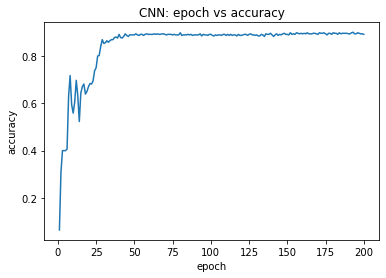

In [26]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("CNN: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

In [27]:
print(history.params)
history.history['loss']
#history.history['accuracy']
# check the keys of history object
#print(history.history)

{'verbose': 2, 'epochs': 200, 'steps': 23}


[1.1551517248153687,
 1.118955373764038,
 1.0958938598632812,
 1.0779387950897217,
 1.0634459257125854,
 1.0504704713821411,
 1.0390182733535767,
 1.0275431871414185,
 1.0152806043624878,
 1.002366065979004,
 0.9873524308204651,
 0.9724316596984863,
 0.9525526762008667,
 0.9343104362487793,
 0.9111050367355347,
 0.8853658437728882,
 0.859619140625,
 0.8307095766067505,
 0.803047239780426,
 0.7726025581359863,
 0.7442346215248108,
 0.7178205847740173,
 0.6915505528450012,
 0.6668639779090881,
 0.6438388824462891,
 0.6229349970817566,
 0.6030412912368774,
 0.5856247544288635,
 0.5689223408699036,
 0.5543178915977478,
 0.5406589508056641,
 0.5297638177871704,
 0.5188328623771667,
 0.5082520842552185,
 0.498675137758255,
 0.4901253879070282,
 0.4836634695529938,
 0.475900799036026,
 0.46904486417770386,
 0.46407440304756165,
 0.4569077789783478,
 0.45281603932380676,
 0.4480326771736145,
 0.44365397095680237,
 0.4390903115272522,
 0.43653807044029236,
 0.43173933029174805,
 0.4290235042572

In [28]:
from tensorflow.keras.losses import MeanSquaredError

In [29]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='tanh', name='layer_1'))
model2.add(Dense(10, activation='tanh', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [30]:
model().fit(X_train, y_train, epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 1.1588 - accuracy: 0.4040
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 1.1055 - accuracy: 0.4062
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0614 - accuracy: 0.4286
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0315 - accuracy: 0.6562
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 1.0067 - accuracy: 0.6853
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.9852 - accuracy: 0.6094
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.9634 - accuracy: 0.5871
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 0.9426 - accuracy: 0.5982
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 0.9215 - accuracy: 0.6116
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.6094
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8906
Epoch 84/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8929
Epoch 85/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8884
Epoch 86/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8906
Epoch 87/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8884
Epoch 88/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8884
Epoch 89/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8884
Epoch 90/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8884
Epoch 91/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8884
Epoch 92/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8884
Epoch 93/200


Epoch 164/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8951
Epoch 165/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8951
Epoch 166/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8906
Epoch 167/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8929
Epoch 168/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8951
Epoch 169/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8906
Epoch 170/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8929
Epoch 171/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8951
Epoch 172/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8929
Epoch 173/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3262 - accurac

In [31]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 

array([[0.3605629 , 0.30989242, 0.3295447 ],
       [0.34871998, 0.31619483, 0.33508515],
       [0.3466518 , 0.30761445, 0.3457338 ],
       [0.34784266, 0.28413647, 0.3680209 ],
       [0.3418051 , 0.31049654, 0.34769836],
       [0.34701237, 0.31197613, 0.34101152],
       [0.34701237, 0.31197613, 0.34101152],
       [0.350726  , 0.30471507, 0.34455892],
       [0.35142195, 0.29322222, 0.3553558 ],
       [0.35623387, 0.3110511 , 0.33271503],
       [0.35478905, 0.3117582 , 0.33345276],
       [0.3520673 , 0.30900034, 0.3389324 ],
       [0.3501007 , 0.30280977, 0.34708947],
       [0.3480915 , 0.29733852, 0.35456994],
       [0.34632358, 0.29531106, 0.35836536],
       [0.3524997 , 0.29905757, 0.34844273],
       [0.34159583, 0.31472766, 0.34367648],
       [0.35001722, 0.29894695, 0.3510358 ],
       [0.34968257, 0.30522367, 0.3450938 ],
       [0.35010207, 0.3063576 , 0.34354034],
       [0.35467833, 0.31410176, 0.33121994],
       [0.34755668, 0.28876272, 0.36368063],
       [0.

In [32]:
model().evaluate(X_test, y_test)

4/4 [==============================] - 1s 2ms/step - loss: 1.0810 - accuracy: 0.5089


[1.0809828042984009, 0.5089285969734192]

In [33]:
pred_for_val = estimator.predict(dtest_for_val_ini)

NameError: name 'dtest_for_val_ini' is not defined

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
results